In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 18

In [2]:
with open("analysis/society-staghunt.pickle", "rb") as f:
    data = pickle.load(f)

In [3]:
weight_df = pd.DataFrame(
    [
        ["train", population, lb, w]
        for (population, lb, t), weights in data["train_weights"].items()
        for weight in weights
        for w in np.array(weight).ravel()
        if np.isfinite(w)
    ]
    + [
        ["test", population, lb, w]
        for (population, lb, t), weights in data["test_weights"].items()
        for weight in weights
        for w in np.array(weight).ravel()
        if np.isfinite(w)
    ],
    columns=["phase", "population", "lookback", "weight"],
)

weight_df

,phase,population,lookback,weight
0,train,16,1,0.905528
1,train,16,1,0.915074
2,train,16,1,0.904658
3,train,16,1,0.903571
4,train,16,1,0.895205
...,...,...,...,...
41811835,test,512,3,0.050000
41811836,test,512,3,1.000000
41811837,test,512,3,1.000000
41811838,test,512,3,1.000000


(0.0, 1.0)

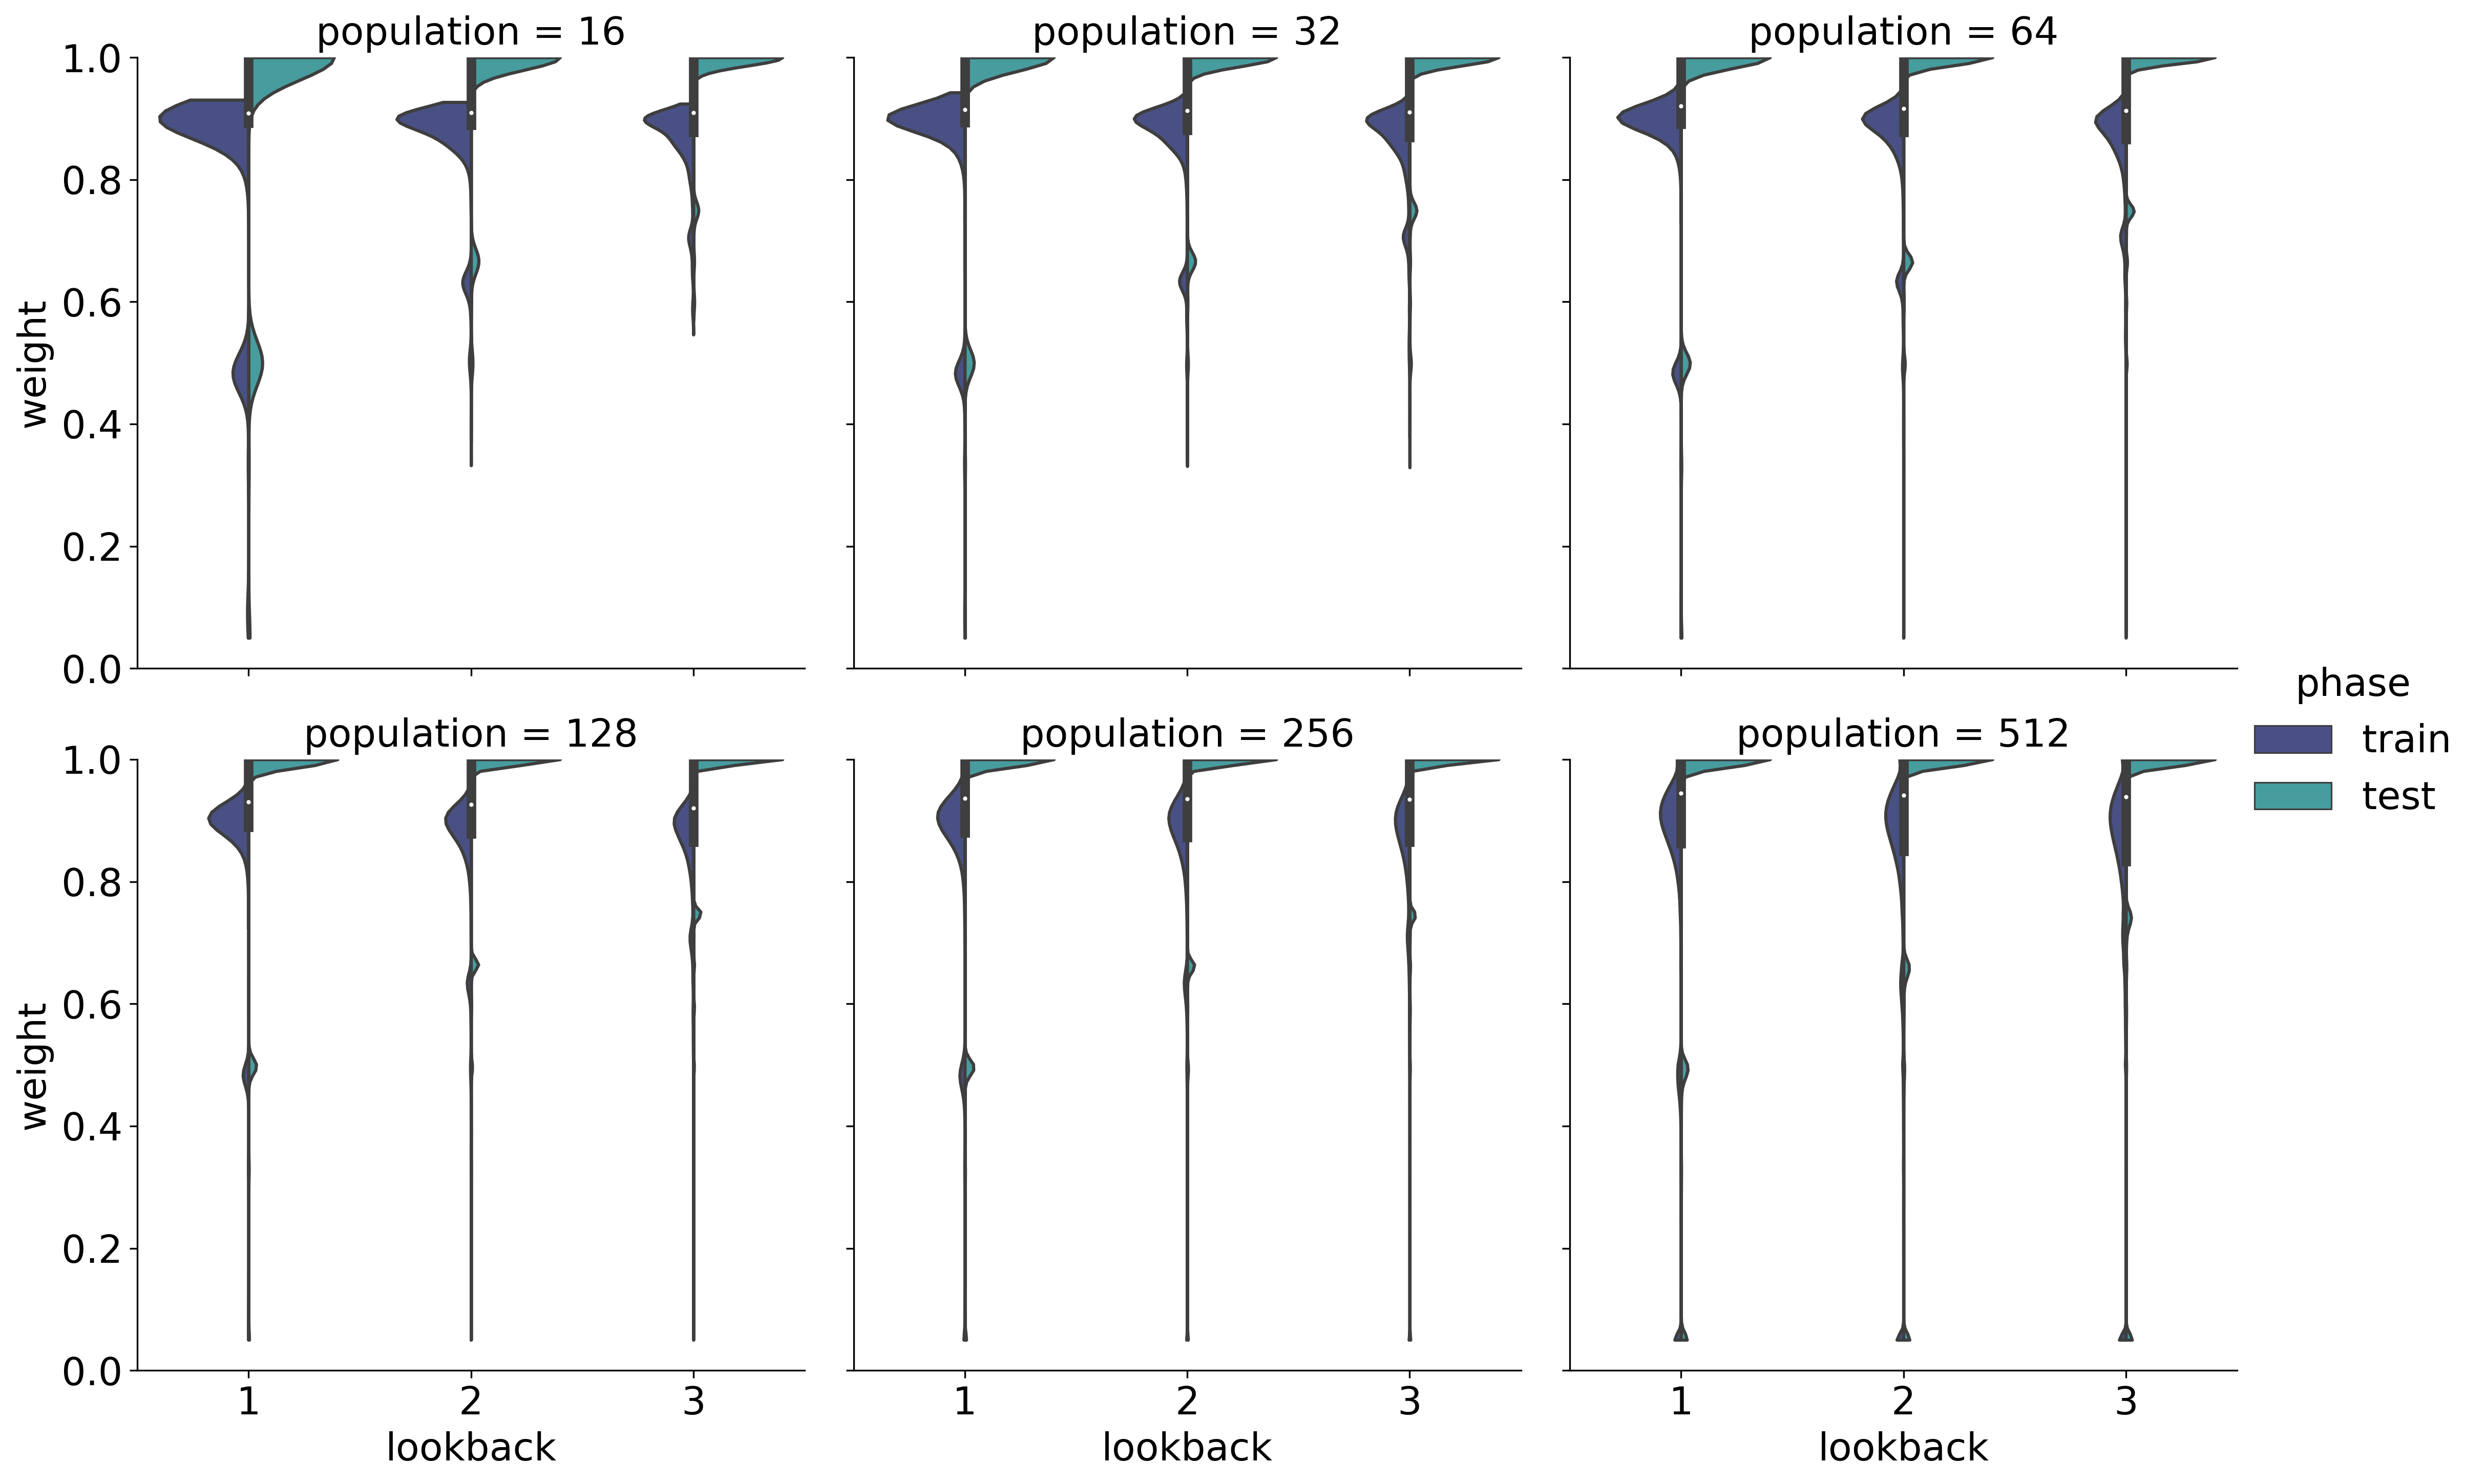

In [4]:
sns.catplot(
    data=weight_df,
    x="lookback",
    y="weight",
    hue="phase",
    col="population",
    palette="mako",
    col_wrap=3,
    kind="violin",
    cut=0,
    split=True,
)

plt.ylim(0.0, 1.0)

In [5]:
reward_df = pd.DataFrame(
    [
        ["train", population, lb, reward]
        for (population, lb, t), rewards in data["train_mean_reward"].items()
        for reward in rewards
    ]
    + [
        ["test", population, lb, reward]
        for (population, lb, t), rewards in data["test_mean_reward"].items()
        for reward in rewards
    ],
    columns=["phase", "population", "lookback", "mean_reward"],
)

reward_df

,phase,population,lookback,mean_reward
0,train,16,1,2.693575
1,train,16,1,2.711962
2,train,16,1,2.566263
3,train,16,1,2.617612
4,train,16,1,2.628600
...,...,...,...,...
715,test,512,3,2.952354
716,test,512,3,2.973469
717,test,512,3,2.945122
718,test,512,3,2.964500


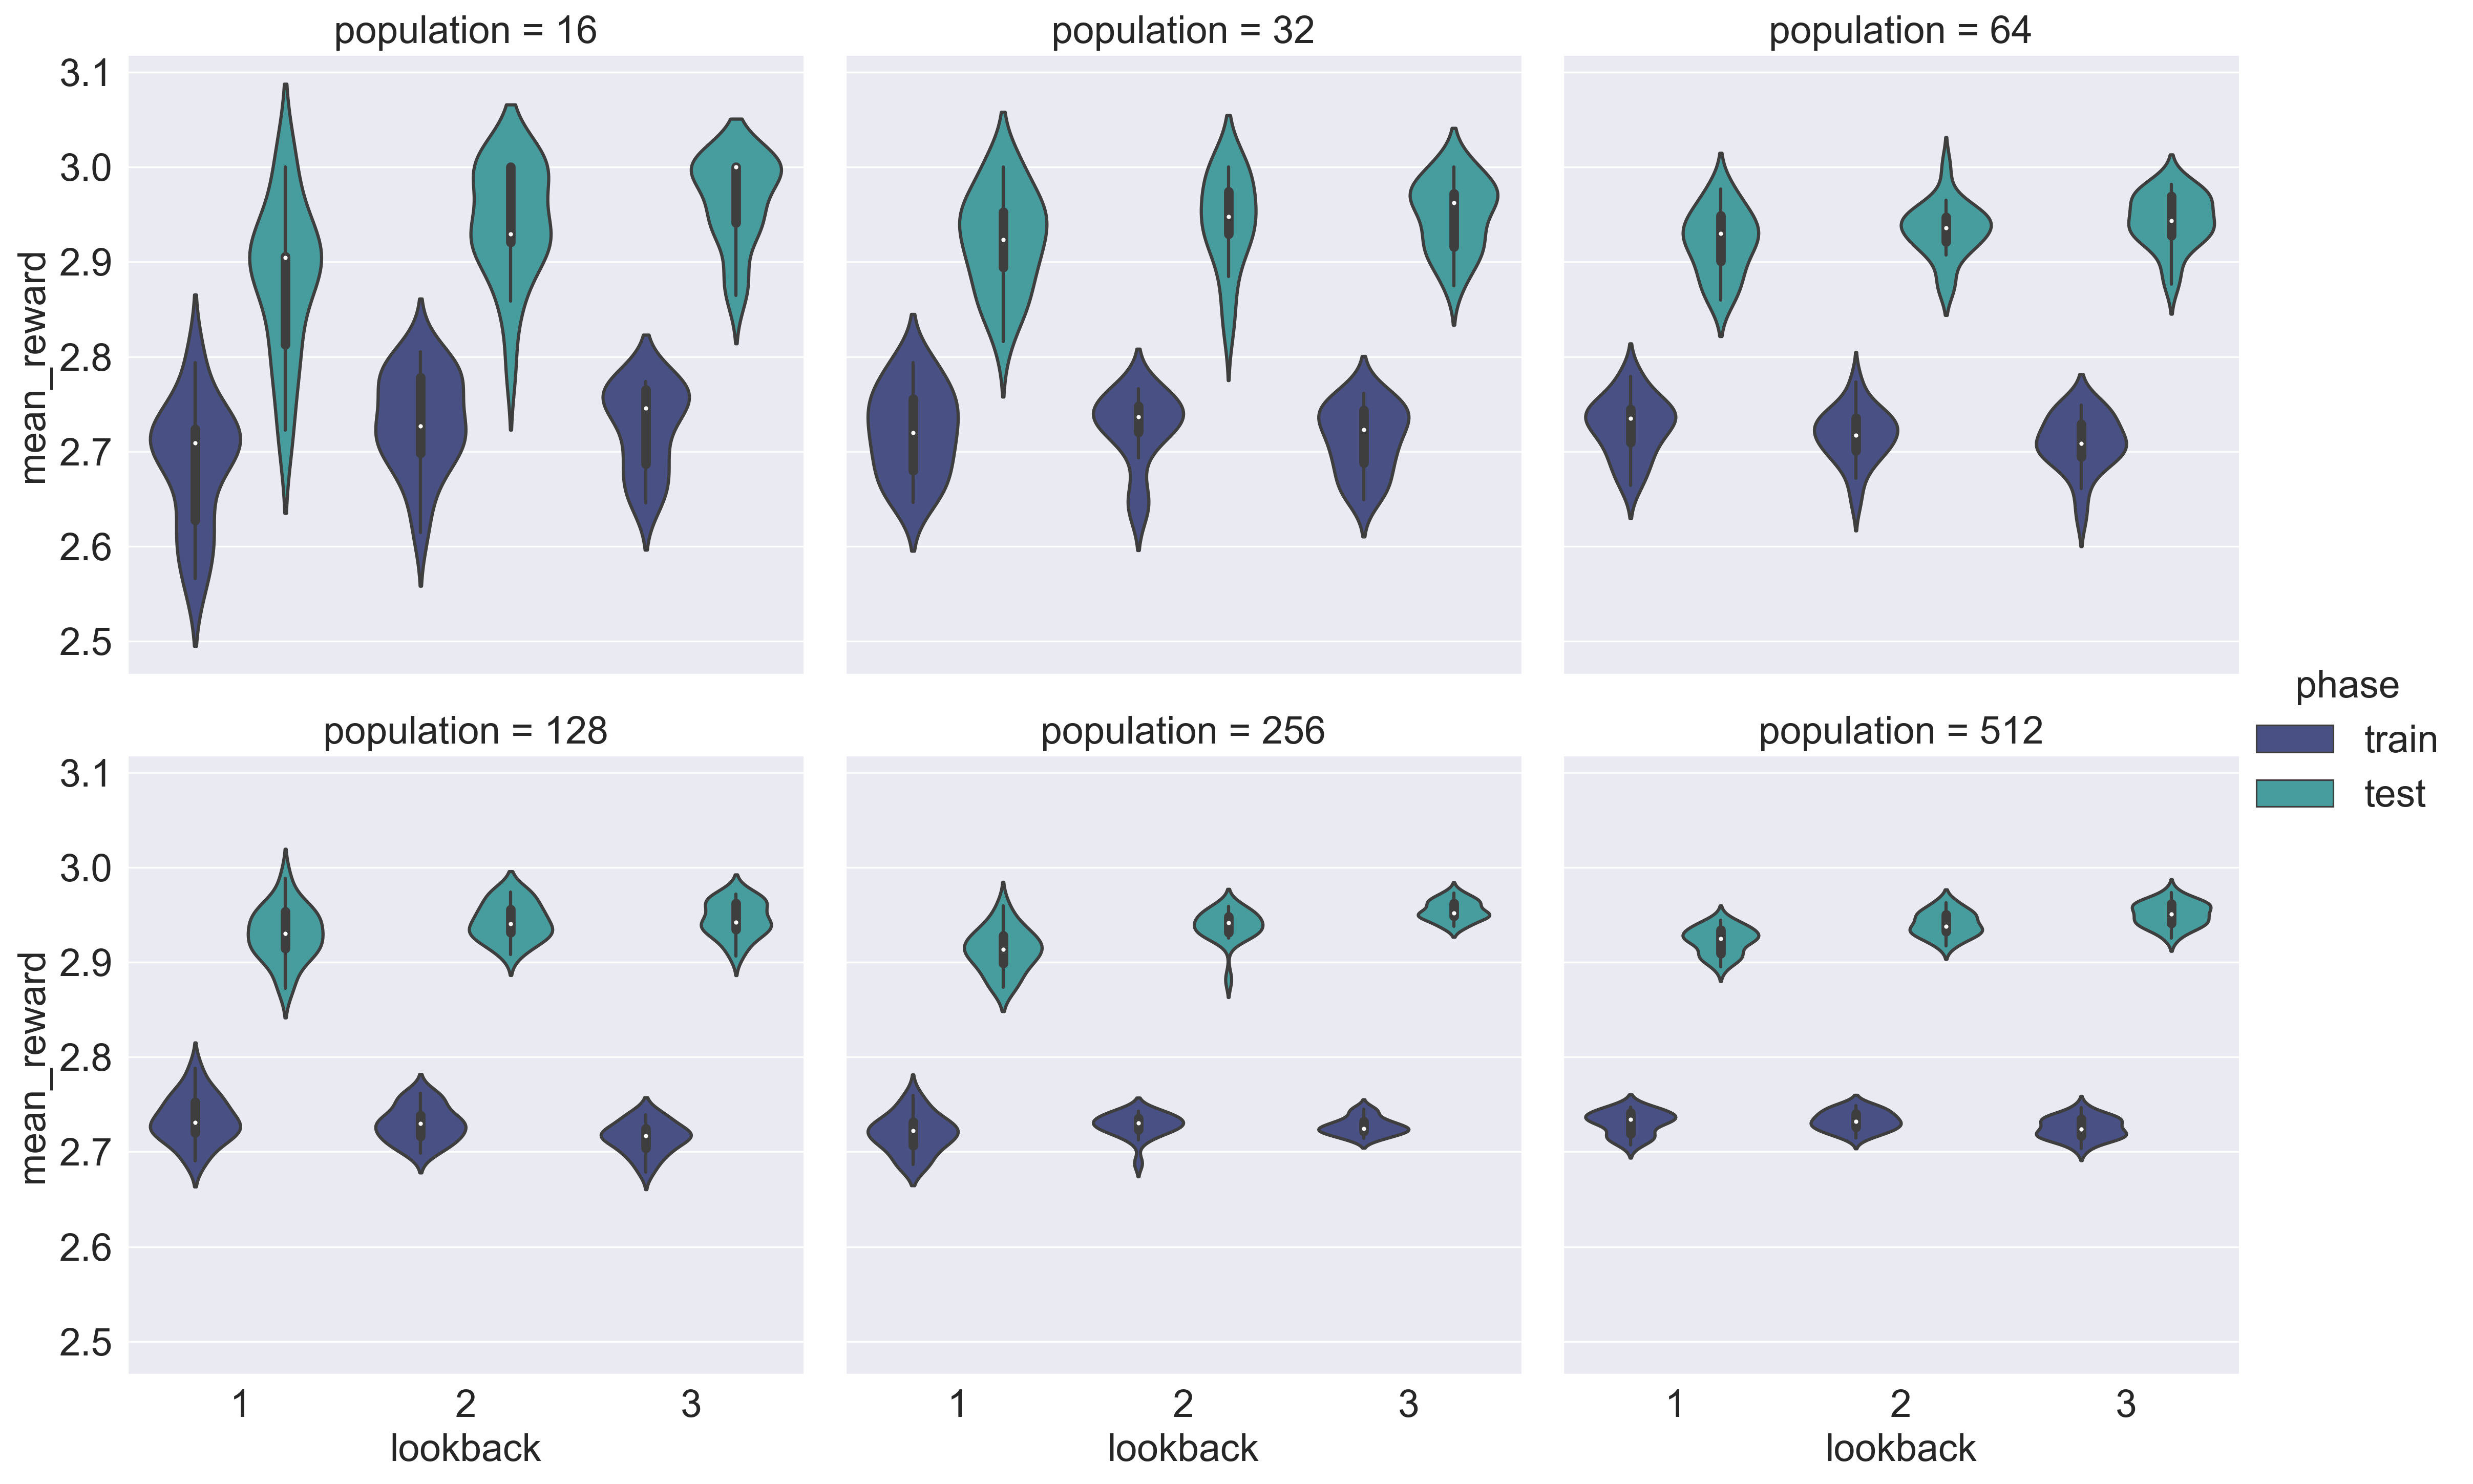

In [6]:
sns.set_style("darkgrid")

sns.catplot(
    reward_df,
    x="lookback",
    y="mean_reward",
    col="population",
    col_wrap=3,
    hue="phase",
    palette="mako",
    kind="violin",
)

In [7]:
agg_df = reward_df.groupby(["phase", "population", "lookback"]).agg(
    {"mean_reward": ["mean", "std"]}
)

agg_df

mean_reward          
                                 mean       std
phase population lookback                      
test  16         1           2.881292  0.079739
                 2           2.940836  0.059907
                 3           2.964130  0.046246
      32         1           2.921941  0.052792
                 2           2.943095  0.049658
                 3           2.949015  0.037384
      64         1           2.920703  0.034774
                 2           2.933413  0.028617
                 3           2.943149  0.028456
      128        1           2.929465  0.028174
                 2           2.942844  0.019740
                 3           2.945169  0.018581
      256        1           2.912571  0.022851
                 2           2.938058  0.016850
                 3           2.954314  0.010284
      512        1           2.922675  0.013857
                 2           2.940171  0.012865
                 3           2.950576  0.012505
train 16         1           2.687114  0.064916
                 2           2.731504  0.051129
                 3           2.725799  0.045000
      32         1           2.721149  0.046439
                 2           2.724429  0.038428
                 3           2.713153  0.035566
      64         1           2.726198  0.031416
                 2           2.716656  0.028581
                 3           2.709291  0.029692
      128        1           2.733880  0.024693
                 2           2.729163  0.018559
                 3           2.714789  0.016507
      256        1           2.719553  0.020046
                 2           2.728087  0.012721
                 3           2.726960  0.009113
      512        1           2.730786  0.012103
                 2           2.732723  0.010065
                 3           2.725058  0.011149

In [8]:
pivoted_df = (
    agg_df.reset_index()
    .pivot(["phase", "population"], columns="lookback")
    .reset_index()
)

pivoted_df

C:\Users\jerem\AppData\Local\Temp/ipykernel_18976/913573291.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted_df = agg_df.reset_index().pivot(["phase", "population"], columns="lookback").reset_index()


phase population mean_reward                                \
                                  mean                           std   
lookback                             1         2         3         1   
0          test         16    2.881292  2.940836  2.964130  0.079739   
1          test         32    2.921941  2.943095  2.949015  0.052792   
2          test         64    2.920703  2.933413  2.943149  0.034774   
3          test        128    2.929465  2.942844  2.945169  0.028174   
4          test        256    2.912571  2.938058  2.954314  0.022851   
5          test        512    2.922675  2.940171  2.950576  0.013857   
6         train         16    2.687114  2.731504  2.725799  0.064916   
7         train         32    2.721149  2.724429  2.713153  0.046439   
8         train         64    2.726198  2.716656  2.709291  0.031416   
9         train        128    2.733880  2.729163  2.714789  0.024693   
10        train        256    2.719553  2.728087  2.726960  0.020046   
11        train        512    2.730786  2.732723  2.725058  0.012103   

                              
                              
lookback         2         3  
0         0.059907  0.046246  
1         0.049658  0.037384  
2         0.028617  0.028456  
3         0.019740  0.018581  
4         0.016850  0.010284  
5         0.012865  0.012505  
6         0.051129  0.045000  
7         0.038428  0.035566  
8         0.028581  0.029692  
9         0.018559  0.016507  
10        0.012721  0.009113  
11        0.010065  0.011149

In [9]:
for _, row in pivoted_df[pivoted_df["phase"] == "train"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["mean_reward"]["mean"],
                row["mean_reward"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$2.687 \pm 0.065$	&	$2.732 \pm 0.051$	&	$2.726 \pm 0.045$ \\
32	&	$2.721 \pm 0.046$	&	$2.724 \pm 0.038$	&	$2.713 \pm 0.036$ \\
64	&	$2.726 \pm 0.031$	&	$2.717 \pm 0.029$	&	$2.709 \pm 0.030$ \\
128	&	$2.734 \pm 0.025$	&	$2.729 \pm 0.019$	&	$2.715 \pm 0.017$ \\
256	&	$2.720 \pm 0.020$	&	$2.728 \pm 0.013$	&	$2.727 \pm 0.009$ \\
512	&	$2.731 \pm 0.012$	&	$2.733 \pm 0.010$	&	$2.725 \pm 0.011$ \\


In [10]:
for _, row in pivoted_df[pivoted_df["phase"] == "test"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["mean_reward"]["mean"],
                row["mean_reward"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$2.881 \pm 0.080$	&	$2.941 \pm 0.060$	&	$2.964 \pm 0.046$ \\
32	&	$2.922 \pm 0.053$	&	$2.943 \pm 0.050$	&	$2.949 \pm 0.037$ \\
64	&	$2.921 \pm 0.035$	&	$2.933 \pm 0.029$	&	$2.943 \pm 0.028$ \\
128	&	$2.929 \pm 0.028$	&	$2.943 \pm 0.020$	&	$2.945 \pm 0.019$ \\
256	&	$2.913 \pm 0.023$	&	$2.938 \pm 0.017$	&	$2.954 \pm 0.010$ \\
512	&	$2.923 \pm 0.014$	&	$2.940 \pm 0.013$	&	$2.951 \pm 0.013$ \\
